# Proyecto 9

### Descripción del proyecto
Lo has hecho de maravilla en el curso y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

* registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.

Lo que vas a investigar: 

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.


### Paso 1. Acceda los datos y prepáralos para el análisis

Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 

In [6]:
#Cargar todas las librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

In [7]:
#Cargar los datos
df_visits=pd.read_csv('./visits_log_us.csv')
df_orders=pd.read_csv('./orders_log_us.csv')
df_costs=pd.read_csv('./costs_us.csv')

###  Tabla Visits
La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

* Uid: identificador único del usuario.
* Device: dispositivo del usuario.
* Start Ts: fecha y hora de inicio de la sesión.
* End Ts: fecha y hora de término de la sesión.
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
* Todas las fechas de esta tabla están en formato AAAA-MM-DD.

In [8]:
#Estudio de los datos de la tabla
df_visits.info()
display(df_visits)
df_visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


No se observan valores nulos pero se observan tipo de datos inadecuados para las columnas End Ts y Start Ts.
Cambiaremos este tipo de datos para el futuro análisis y también pondremos los nombres de las columnas en minusculas y quitaremos el espacio que hay entre los nombres.

In [9]:
#Cambiamos los nombres a minusculas
df_visits.columns=df_visits.columns.str.lower()
#cambiamos los nombres de end y start ts para evitar tener problemas con los espacios}
df_visits.columns=df_visits.columns.str.replace(' ','_')
#Mostramos los cambios
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [10]:
#cambiamos el tipo de datos a las comunas de fecha
df_visits['start_ts']=pd.to_datetime(df_visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_visits['end_ts']=pd.to_datetime(df_visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
#Revisamos los cambios
df_visits.info()
display(df_visits)
df_visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


,end_ts,source_id,start_ts,uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


Al hacer esta conversión obtenemos estadisticas para las columnas end_ts y start_ts en donde se observa que la media para la fecha de inicio de sesión (start_ts) es el 18 de diciembre de 2017 a las 06:17 y la media para el término de sesión es (end_ts) es el mismo día a las 06:28 

###  Tabla Orders
La tabla orders (datos sobre pedidos):

* Uid: identificador único del usuario que realiza un pedido.
* Buy Ts: fecha y hora del pedido. 
* Revenue: el ingreso de Showz por el pedido.


In [11]:
#Estudio de los datos de la tabla
df_orders.info()
display(df_orders)
df_orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


No se observan valores nulos y al igual que en la tabla visits, se cambiarán los nombres de las columnas a minusculas, se quitará el espacio en la  fecha y se cambiará el tipo de dato de esta columna a formato de fecha.

In [12]:
#Cambiamos los nombres a minusculas
df_orders.columns=df_orders.columns.str.lower()
#cambiamos los nombres de end y start ts para evitar tener problemas con los espacios}
df_orders.columns=df_orders.columns.str.replace(' ','_')
#Mostramos los cambios
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
#Cambiamos el tipo de datos a la comuna buy_ts
df_orders['buy_ts']=pd.to_datetime(df_orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
#Revisamos los cambios
df_orders.info()
display(df_orders)
df_orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18
min,2017-06-01 00:10:00,0.000000,3.135781e+14
25%,2017-10-13 17:28:00,1.220000,4.533567e+18
50%,2017-12-21 14:12:00,2.500000,9.102274e+18
75%,2018-03-02 16:10:00,4.890000,1.368290e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.818359,5.285742e+18


Al hacer esta conversión obtenemos estadisticas para las columna buy_ts en donde se observa que la media para la fecha de compra (buy_ts) es el 20 de diciembre de 2017 a las 05:14. Y la media del ingreso por pedido es de 4.99 

###  Tabla Costs
La tabla costs (datos sobre gastos de marketing):

* source_id: identificador de la fuente de anuncios.
* dt: fecha.
* costs: gastos en esta fuente de anuncios en este día.

In [14]:
#Estudio de los datos de la tabla
df_costs.info()
display(df_costs)
df_costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


No se observan valores nulos en la tabla. En este caso no hay que pasar a minúsculas los nombres de las columnas ni eliminar los espacios. Procedemos a cambiar el tipo de datos de la fecha.

In [15]:
#Cambiamos el tipo de datos a la comuna buy_ts
df_costs['dt']=pd.to_datetime(df_costs['dt'], format='%Y-%m-%d')                            
#Revisamos los cambios
df_costs.info()
display(df_costs)
df_costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


,source_id,dt,costs
count,2542.000000,2542,2542.000000
mean,4.857199,2017-11-29 09:04:57.403619072,129.477427
min,1.000000,2017-06-01 00:00:00,0.540000
25%,2.000000,2017-08-30 00:00:00,21.945000
50%,4.000000,2017-11-29 00:00:00,77.295000
75%,9.000000,2018-02-28 00:00:00,170.065000
max,10.000000,2018-05-31 00:00:00,1788.280000
std,3.181581,NaN,156.296628


Se observa que la media para la fecha es el 29 de noviembre de 2017 y el valor mínimo para esta es el 01 de junio de 2017. En el caso de los costos la media es de 129.48.

### Paso 2. Informes y métricas

### 1. Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

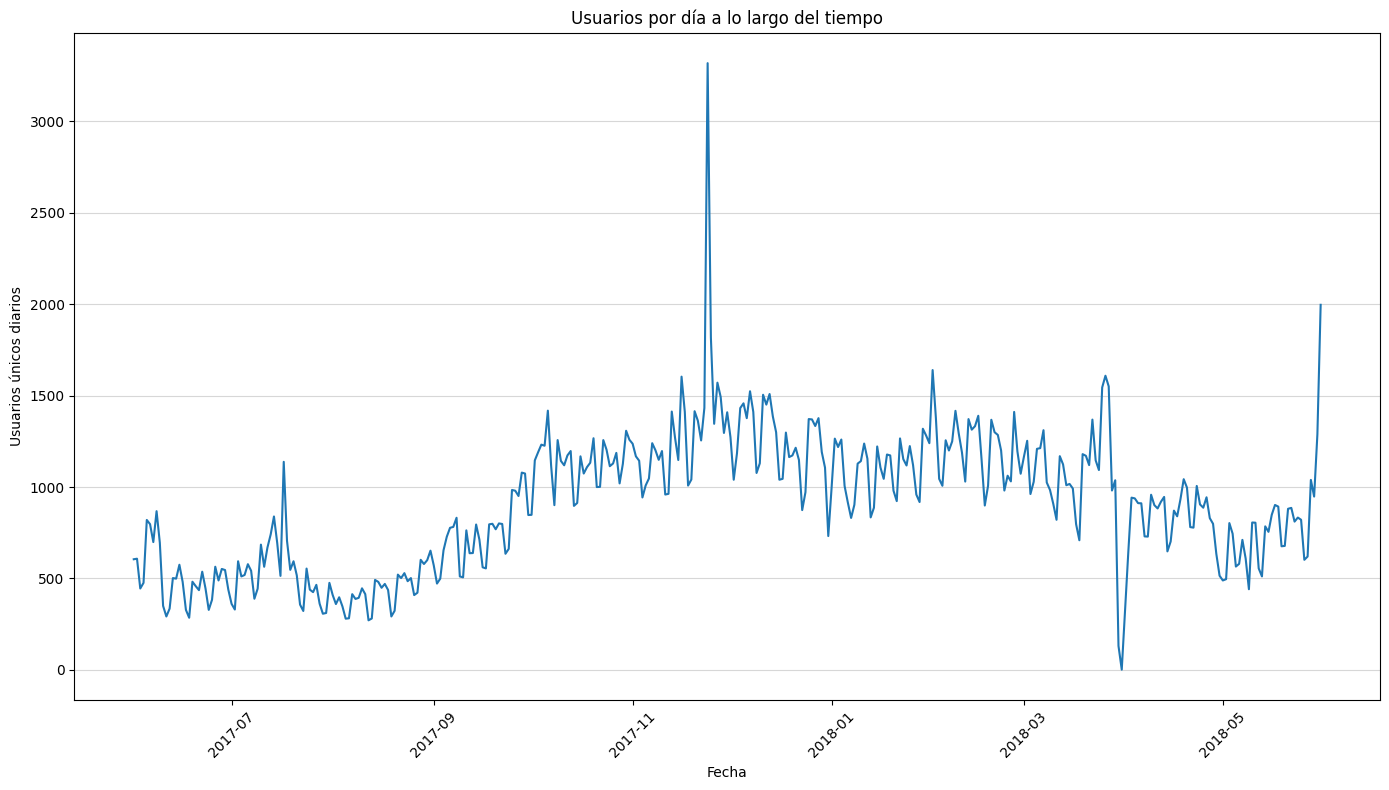

In [16]:
#Usuarios unicos por día 
dau = df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].nunique().reset_index()
dau.columns=['date', 'users']
#Gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=dau, x='date', y='users')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos diarios')
plt.title('Usuarios por día a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Se observa que el pico más alto de visias fue en diciembre de 2017 y el más bajo en abril de 2018

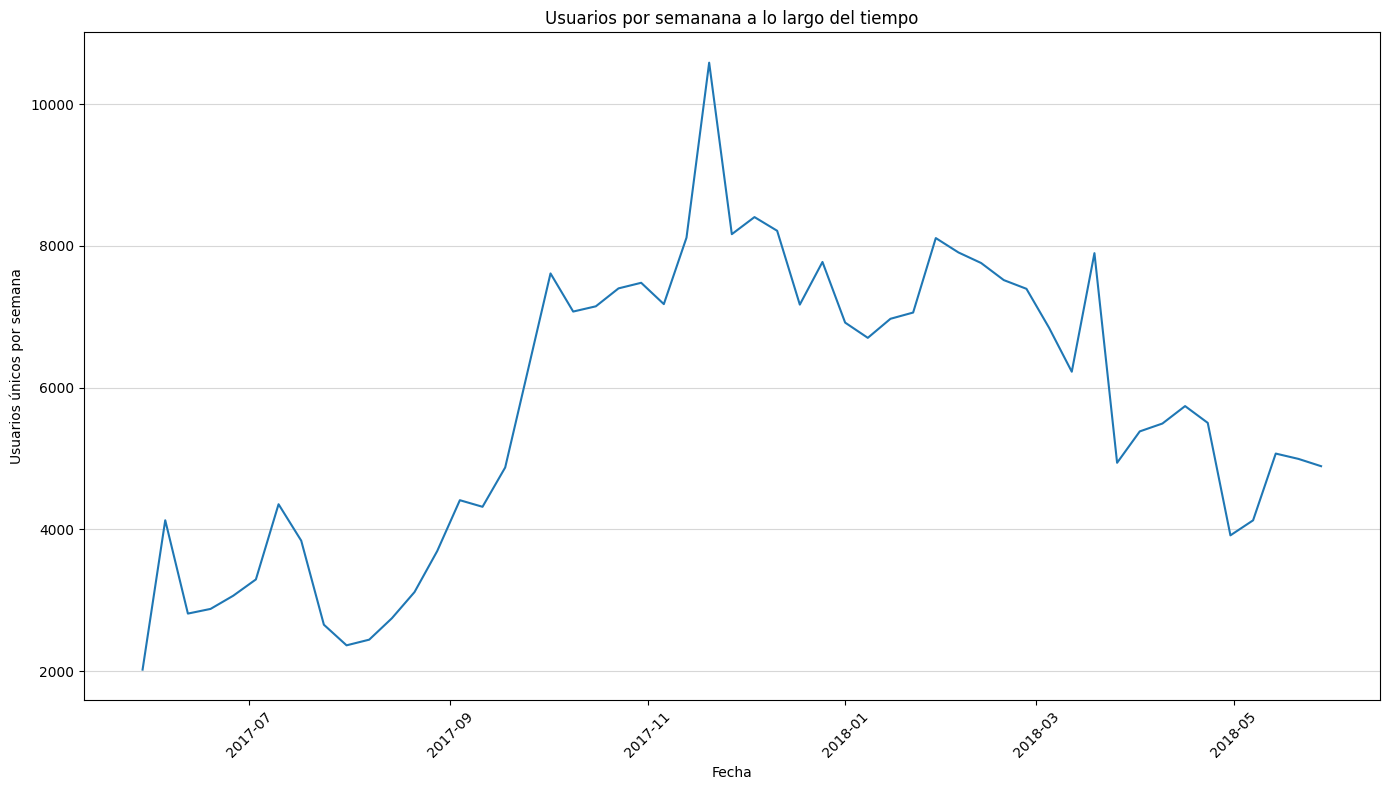

In [17]:
#Usuarios unicos por semana
wau=df_visits.groupby(df_visits['start_ts'].dt.to_period('W'))['uid'].nunique().reset_index()
wau['start_ts'] = wau['start_ts'].dt.to_timestamp()
wau.columns=['week', 'users']
#Gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=wau, x='week', y='users')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos por semana')
plt.title('Usuarios por semanana a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Se observa que el pico más alto fue en duciembre de 2017 y en este caso el más bajo en junio de 2017.

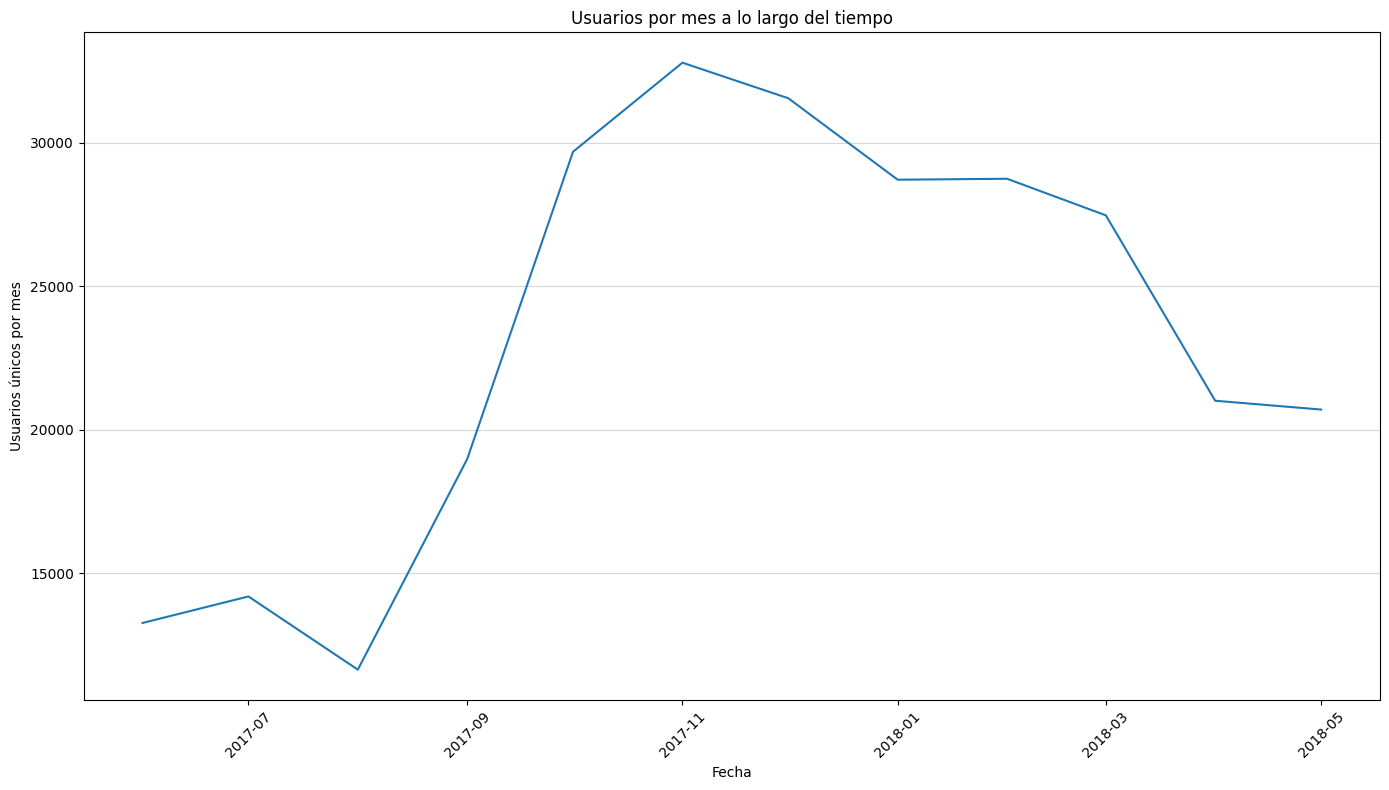

In [18]:
#Usuarios unicos por mes
mau=df_visits.groupby(df_visits['start_ts'].dt.to_period('M'))['uid'].nunique().reset_index()
mau['start_ts']=mau['start_ts'].dt.to_timestamp()
mau.columns=['month', 'users']
#Gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=mau, x='month', y='users')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos por mes')
plt.title('Usuarios por mes a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Se observa que el pico más alto fue en el mes de noviembre de 2017 y el pico más bajo en agosto del mismo año.

#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [19]:
#Extraemos la fecha
df_visits['session_date']=df_visits['start_ts'].dt.date

#Agrupación por año, mes y día para obtener el número de sesiones y usuarios únicos
sessions_per_user = df_visits.groupby(['session_date']).agg(n_sessions=('uid', 'count'), n_users=('uid', 'nunique')).reset_index()
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display(sessions_per_user)

,session_date,n_sessions,n_users,sessions_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


Se observa que los usuarios tienen en promedio una sesión por día 

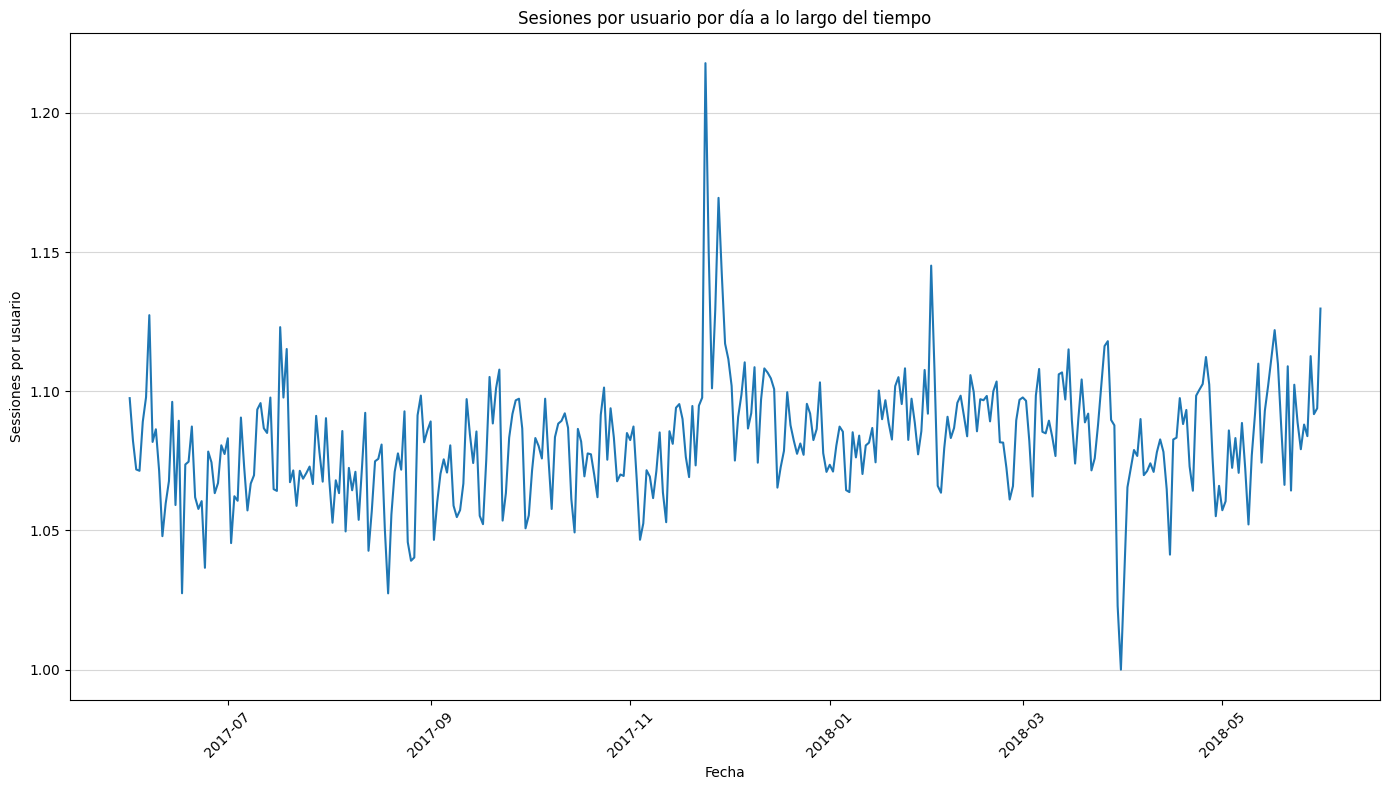

In [20]:
#Gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=sessions_per_user, x='session_date', y='sessions_per_user')
plt.xlabel('Fecha')
plt.ylabel('Sessiones por usuario')
plt.title('Sesiones por usuario por día a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Se observa que los usuarios tienen más sesiones en el mes de diciembre con un promedio de más de 1.2 sesiones al día.

#### ¿Cuál es la duración de cada sesión?

643.0256872565387


Text(0, 0.5, 'Frecuencia')

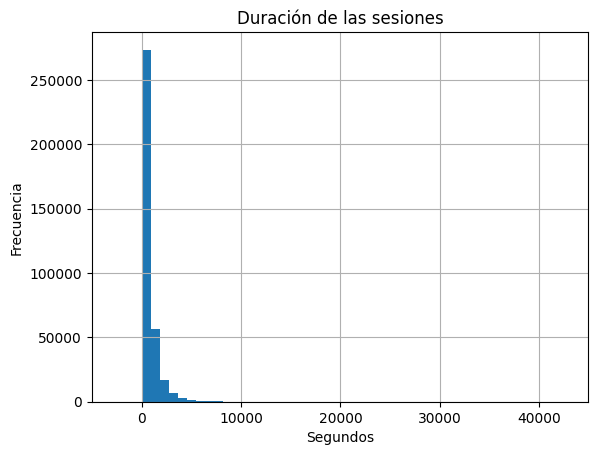

In [21]:
#duración de cada sesion en segundos
df_visits['session_duration_sec']=(df_visits['end_ts']-df_visits['start_ts']).dt.total_seconds()
print(df_visits['session_duration_sec'].mean())
df_visits['session_duration_sec'].hist(bins=50)
plt.title('Duración de las sesiones')
plt.xlabel('Segundos')
plt.ylabel('Frecuencia')

Se observa que la duración es de 643 segundos y esta no tiene una distribución uniforme. Al no ser una dustribución normal se considerará la moda para la obtención de la duración media de cada sesión.

In [22]:
#Calculamos moda para obtener la duración media de la sesión 
average_session_length=df_visits['session_duration_sec'].mode()
average_session_length

0    60.0
Name: session_duration_sec, dtype: float64

Se observa que la duración media de cada sesión es de 60 segundos.

#### ¿Con qué frecuencia los usuarios regresan?

In [25]:
# Encontrar la primera fecha de actividad de cada usuario
first_activity_date = df_visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'

# Unión de la primera fecha de actividad con los datos de actividad del usuario
df_visits = df_visits.join(first_activity_date, on='uid',rsuffix='_first')

# Redondeo de las fechas al primer día del mes
df_visits['activity_month'] = df_visits['start_ts'].dt.to_period('M').apply(lambda r: r.start_time)
df_visits['first_activity_month'] = df_visits['first_activity_date'].dt.to_period('M').apply(lambda r: r.start_time)

# Calcular el ciclo de vida de la cohorte en meses
df_visits['cohort_lifetime'] = (df_visits['activity_month'].dt.year - df_visits['first_activity_month'].dt.year) * 12 + (df_visits['activity_month'].dt.month - df_visits['first_activity_month'].dt.month)

In [26]:
#construcción del dataframe con cohortes 
cohorts=(
    df_visits.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

#Construcción del dataframe inicial de ussuarios
initial_users_count=cohorts[cohorts['cohort_lifetime']==0][['first_activity_month', 'uid']]
initial_users_count =initial_users_count.rename(columns={'uid':'cohort_users'})

#Unión de los dataframes de cohortes e inicial_user_count
cohorts=cohorts.merge(initial_users_count, on='first_activity_month')

#Cálculo de la tasa de retención
cohorts['retention']=cohorts['uid']/cohorts['cohort_users']


In [27]:
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [28]:
#Compilación de la tabla dinámica
retention_pivot=cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


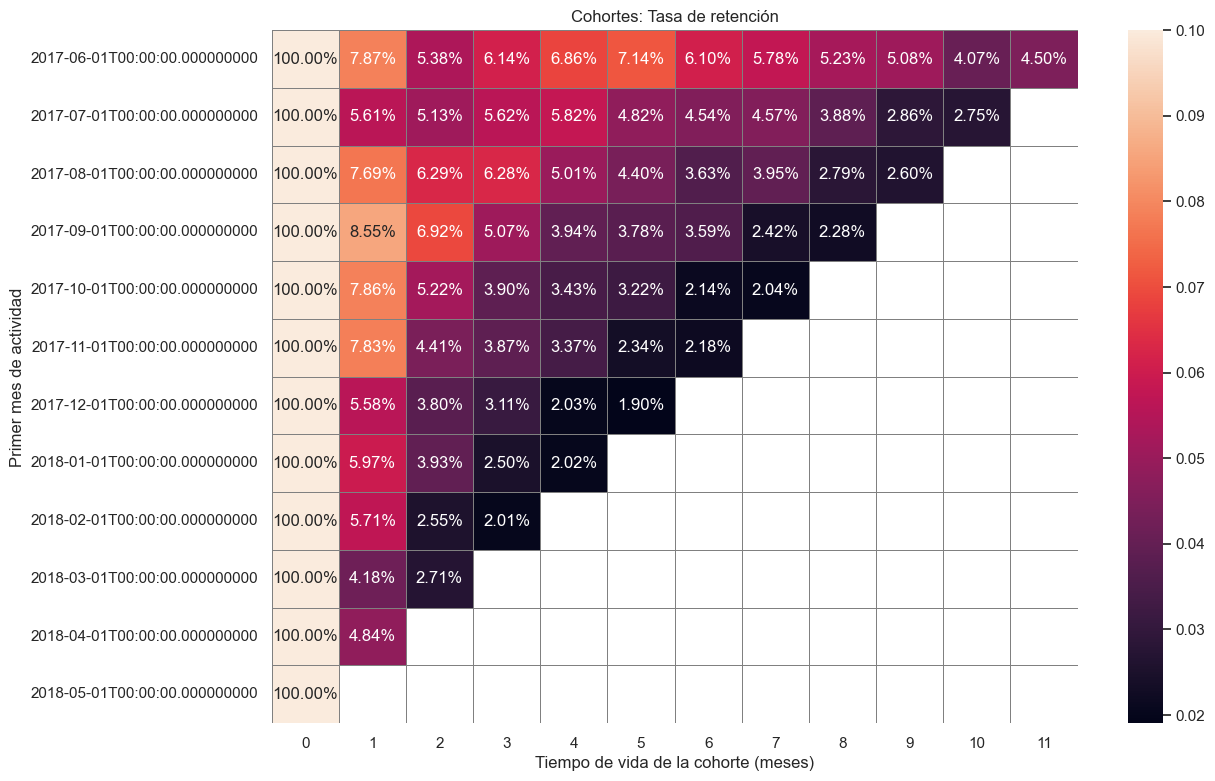

In [29]:
#creación de un mapa de calor para mejorar la visualización
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohortes: Tasa de retención')
sns.heatmap(
    retention_pivot, annot=True, fmt='.2%', linewidths=0.5, linecolor='gray', vmax=0.1
)
plt.xlabel('Tiempo de vida de la cohorte (meses)')
plt.ylabel('Primer mes de actividad')
plt.show()

La tasa de retención de la primer cohorte es mejor en los primeros meses en comparación con el resto de las cohortes, Se observa una tasa de retención mejor hasta noviembre de 2017 en comparación de las de finales de 2017 en adelante. Conforme avanzan los meses se nota una tendencia a disminuir la tasa de retención de las cohortes. 

### 2. Ventas

#### ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [30]:
#Primera fecha de visita por usuario
first_visits = df_visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.rename(columns={'start_ts': 'first_visit'}, inplace=True)
#Primera fecha de compra por usuario
first_orders = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.rename(columns={'buy_ts': 'first_order'}, inplace=True)
#Merge de las tablas
df_conversion = pd.merge(first_visits, first_orders, on='uid', how='inner')
display(df_conversion)

,uid,first_visit,first_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


In [31]:
#Verificar valores nulos
df_nulls = df_conversion.isnull().sum()
print("Valores nulos por columna:\n", df_nulls)

Valores nulos por columna:
 uid            0
first_visit    0
first_order    0
dtype: int64


Al no tener valores nulos podemos continuar con el análisis

In [32]:
# Diferencia en días entre la primera visita y la primera compra
df_conversion['conversion_days'] = (df_conversion['first_order'] - df_conversion['first_visit']).dt.days
# Crear la categoría de conversión
df_conversion['conversion_category'] = 'conversion_' + df_conversion['conversion_days'].astype(str) + 'd'

In [33]:
# Mostrar la distribución de conversiones
conversion_summary = df_conversion['conversion_category'].value_counts().sort_index()
display(conversion_summary)

conversion_category
conversion_0d      26363
conversion_100d       31
conversion_101d       23
conversion_102d       21
conversion_103d       16
                   ...  
conversion_96d        26
conversion_97d        32
conversion_98d        32
conversion_99d        27
conversion_9d        140
Name: count, Length: 345, dtype: int64

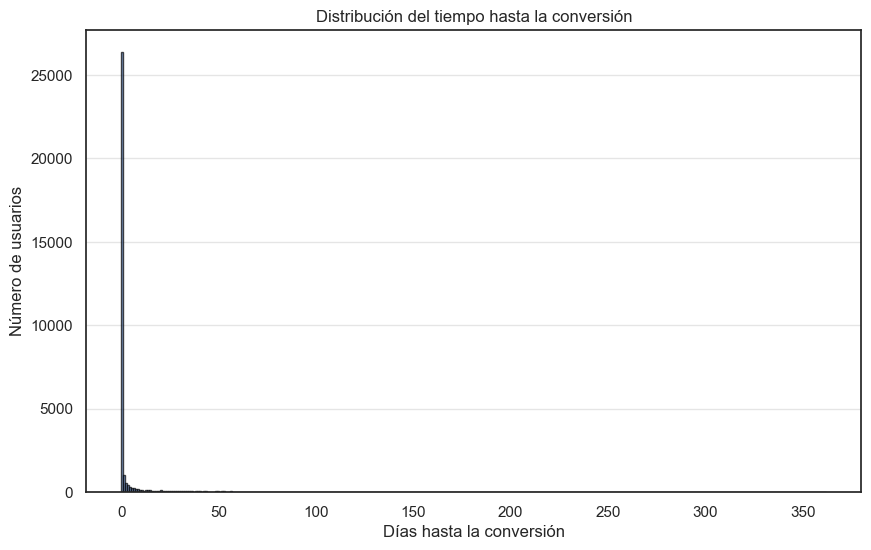

In [34]:
#Visualización en un histograma de los datos obtenidos
plt.figure(figsize=(10,6))
bins=np.arange(0, df_conversion['conversion_days'].max())  
plt.hist(df_conversion['conversion_days'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel("Días hasta la conversión")
plt.ylabel("Número de usuarios")
plt.title("Distribución del tiempo hasta la conversión")
plt.grid(axis='y', alpha=0.5)
plt.show()

Se observa que los usuarios se convierten en su mayoría en compradores durante la primera sesión.  Al no ser visibles los resultados de forma gráfica, se cambiará la escala de forma logarítmica y se agruparán los datos en intervalos de 5 días. 

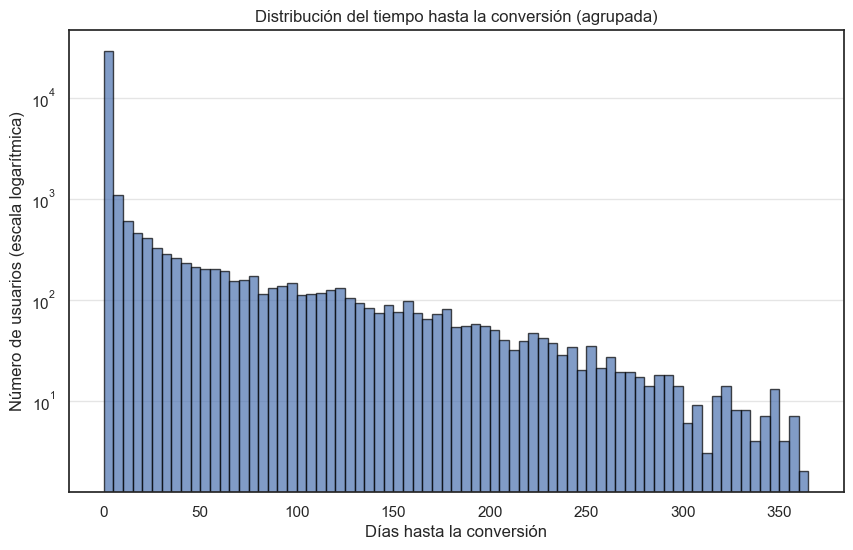

In [35]:
#Visualización con escala logarítmica y agrupación de los datos en intervalos de 5 días
plt.figure(figsize=(10,6))
bins=np.arange(0, df_conversion['conversion_days'].max() + 5, 5)  
plt.hist(df_conversion['conversion_days'], bins=bins, edgecolor='black', alpha=0.7, log=True)
plt.xlabel("Días hasta la conversión")
plt.ylabel("Número de usuarios (escala logarítmica)")
plt.title("Distribución del tiempo hasta la conversión (agrupada)")
plt.grid(axis='y', alpha=0.5)
plt.show()


En este caso se puede apreciar mucho mejor que la mayoría de los usuarios se convierten en compradores en los primeros 5 días, los usuartios que compran después de ese periodo son menos de una décima parte en comparación a la primera agrupación. Los usuarios que tardan más de 50 días en comprar son casi imperceptibles.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [36]:
#Merge entre orders con df_conversion
df_orders = df_orders.merge(df_conversion[['uid', 'first_order']], on='uid', how='left')
# Cear la cohorte en base a la primera compra del usuario
df_orders['cohort'] = df_orders['first_order'].dt.to_period('M')
#Fecha del pedido como una fecha de calendario
df_orders['session_date'] = df_orders['buy_ts'].dt.to_period('M')

In [37]:
#Agrupación por cohorte y mes de compra para contar pedidos
cohorts2 = df_orders.groupby(['cohort', 'session_date']).size().reset_index(name='orders')
display(cohorts2)

,cohort,session_date,orders
0,2017-06,2017-06,2354
1,2017-06,2017-07,177
2,2017-06,2017-08,174
3,2017-06,2017-09,226
4,2017-06,2017-10,292
...,...,...,...
74,2018-03,2018-05,176
75,2018-04,2018-04,2495
76,2018-04,2018-05,195
77,2018-05,2018-05,3249


In [38]:
#Tabla pivote
cohort_orders_calendar=cohorts2.pivot_table(
    index='cohort',      
    columns='session_date', 
    values='orders', 
    aggfunc='sum'
)
display(cohort_orders_calendar)

session_date,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
cohort,,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0,NaN
2017-07,NaN,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08,NaN,NaN,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN
2017-09,NaN,NaN,NaN,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN
2017-10,NaN,NaN,NaN,NaN,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,5052.0,270.0,202.0,179.0,86.0,105.0,NaN
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3783.0,224.0,159.0,64.0,78.0,NaN
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4095.0,222.0,83.0,70.0,NaN


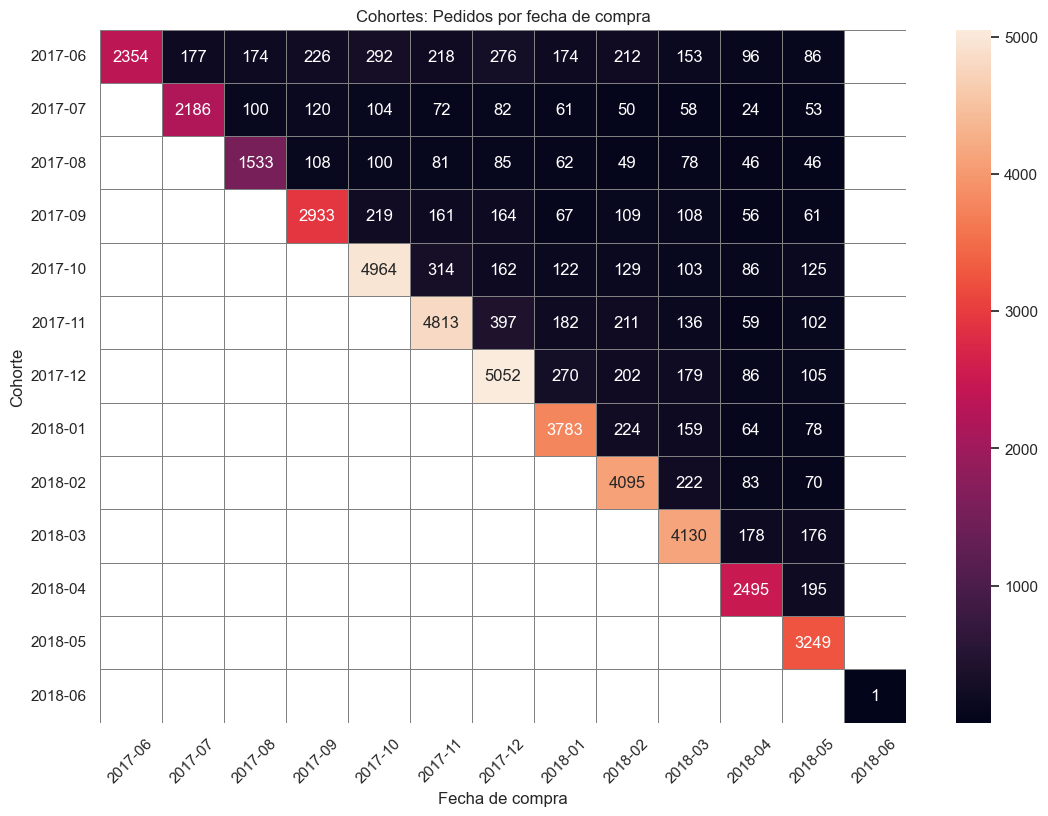

In [39]:
#Heatmap
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohortes: Pedidos por fecha de compra')
sns.heatmap(
    cohort_orders_calendar, annot=True, fmt='.0f', linewidths=0.5, linecolor='gray'
)
plt.xlabel('Fecha de compra')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

Se oserva que la cohorte que realizó el mayor pedido fue la de diciembre de 2017 con un total de 5052 pedidios en el mismo mes. Para el mes de octubre de 2017 la cohorte que hizo el mayor pedido fue la cohorte de ese mismo mes con un total de 4964 pedidos. Se observa que en general, las cohortes que hacen el mayor número de pedidos, son las que se crean el mismo mes. Las cifras del resto de las cohortes para los meses en las que no son creadas no son significantes. Se observa que la actividad de las cohortes disminuyen con el paso de los meses.  Los usuarios de la cohorte de junio de 2017 siguen representando la mayor parte de los clientes aún con el paso de un año.

Se observa que de manera general se hicieron 43071 pedidos durante los primeros 30 días y que el 75% de los clientes hacen un pedido al mes y el máximo de pedidos hechos fueron 48.

#### ¿Cuál es el tamaño promedio de compra?

In [40]:
#Ingresos por cohorte y por fecha de compra
cohort_revenue=df_orders.groupby(['cohort', 'session_date'])['revenue'].sum()
#Pedidos unicos por cohorte y fecha de compra 
cohort_orders=df_orders.groupby(['cohort', 'session_date'])['uid'].size()
#Ingreso promedio por pedido
cohort_avg_orders_revenue=cohort_revenue/cohort_orders
display(cohort_avg_orders_revenue)

cohort   session_date
2017-06  2017-06         4.060106
         2017-07         5.547006
         2017-08         5.088161
         2017-09         8.545575
         2017-10         7.084178
                           ...   
2018-03  2018-05         6.334489
2018-04  2018-04         4.248774
         2018-05         6.204718
2018-05  2018-05         4.286168
2018-06  2018-06         3.420000
Length: 79, dtype: float64

In [41]:
#Convertir a un df para mejorar la visualización y realizar el heatmap
cohort_avg_orders_revenue=cohort_avg_orders_revenue.unstack()
display(cohort_avg_orders_revenue)

session_date,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
cohort,,,,,,,,,,,,,
2017-06,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093,NaN
2017-07,NaN,5.287123,6.446100,9.992083,6.637596,4.721806,3.659512,3.789508,5.454400,5.345690,11.790000,5.648302,NaN
2017-08,NaN,NaN,4.715479,5.987315,6.281200,6.617901,7.962941,6.265323,5.890000,7.113590,8.702826,5.598478,NaN
2017-09,NaN,NaN,NaN,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.767130,11.206607,7.785574,NaN
2017-10,NaN,NaN,NaN,NaN,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.009120,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,4.370717,4.103955,4.474670,6.284976,4.441471,3.726780,4.598235,NaN
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,NaN
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.687417,4.438482,6.454969,7.524844,2.711282,NaN
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.706266,4.576486,3.453735,3.867143,NaN


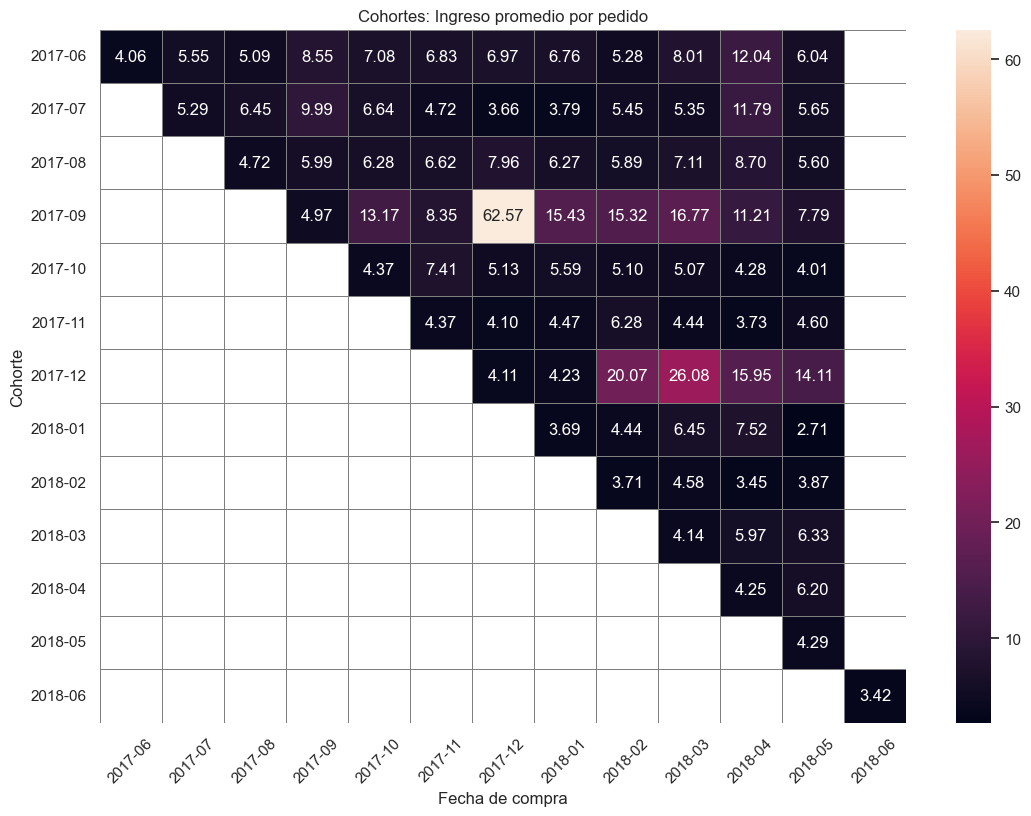

In [42]:
#Heatmap ingreso promedio por pedidos
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohortes: Ingreso promedio por pedido')
sns.heatmap(
   cohort_avg_orders_revenue, annot=True, fmt='.2f', linewidths=0.5, linecolor='gray'
)
plt.xlabel('Fecha de compra')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

Se observa que en general, el mes en el que más ingresos se tiene es en diciembre de 2017 en donde la cohorte que más ingresos tuvo es la de septiembre de 2017 ingreso promedio de 62.57. Aunque la cohorte de septiembre no es la más antigua, se observa que es la que tiene los mayores ingresos por pedidos a lo largo del tiempo. También se observa que la cohorte de diciembre de 2017 tiene un buen núumero de ingresos a partir de febrero de 2018, siendo esta la que muestra cifras más significativas durante 2018. 

#### ¿Cuánto dinero traen? (LTV: Lifetime Value)

In [43]:
#Cohorte con base en base a la primera compra del usuario
df_orders['cohort'] = df_orders['first_order'].dt.to_period('M')
#Fecha del pedido 
df_orders['session_date'] = df_orders['buy_ts'].dt.to_period('M')
#Agrupación por cohorte y mes de compra
cohort_revenue = df_orders.groupby(['cohort', 'session_date'])['revenue'].sum().reset_index()
#Tamaño de número de usuarios únicos
cohort_size = df_orders.groupby('cohort')['uid'].nunique().reset_index()
cohort_size.columns=['cohort', 'cohort_size']
#Merge entre el tamaño de la cohorte e ingresos por cohorte y fecha de compra
cohort_revenue=pd.merge(cohort_revenue, cohort_size, on='cohort')

In [44]:
#Ingreso promedio por cohorte 
cohort_revenue['avg_revenue_per_user'] = cohort_revenue['revenue'] / cohort_revenue['cohort_size']
cohort_revenue['age'] = (cohort_revenue['session_date'] - cohort_revenue['cohort']).apply(lambda x: x.n)

#Tbla pivote
cohort_pivot = cohort_revenue.pivot_table(index='cohort', columns='age', values='avg_revenue_per_user')
#Suma de ingresos promedio por cohorte
cohort_pivot_cumsum = cohort_pivot.cumsum(axis=1)
display(cohort_pivot_cumsum)

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


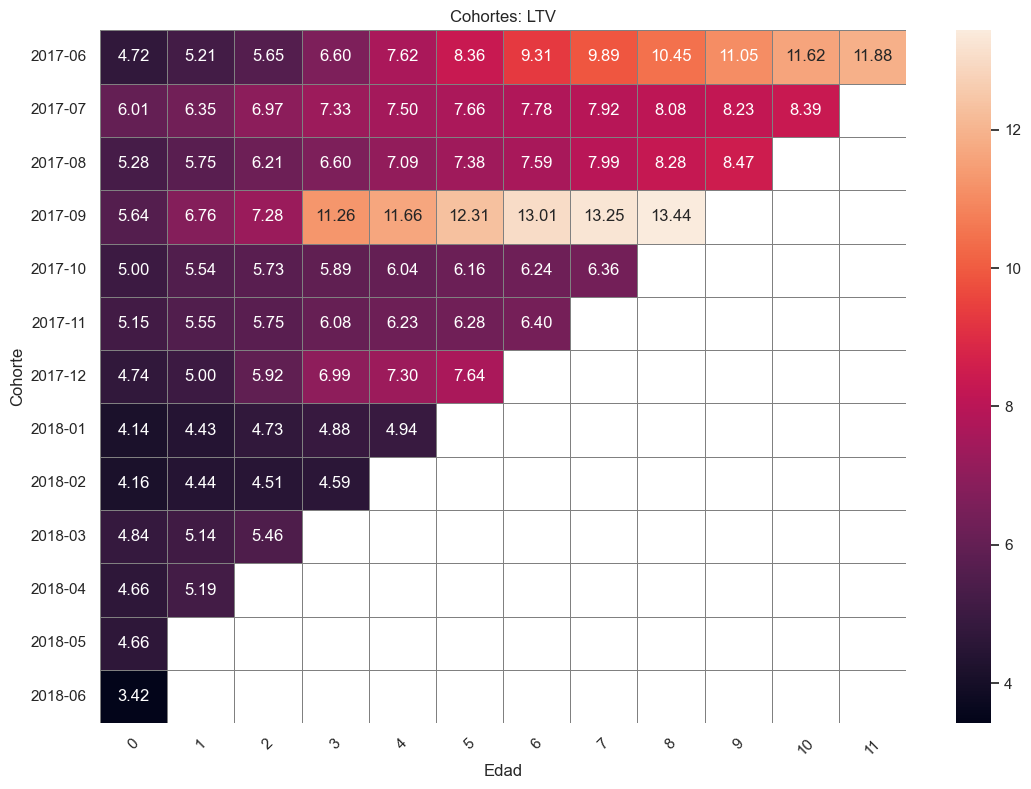

In [45]:
#Heatmap ingreso promedio por pedidos
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohortes: LTV')
sns.heatmap(
   cohort_pivot_cumsum, annot=True, fmt='.2f', linewidths=0.5, linecolor='gray'
)
plt.xlabel('Edad')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

Se observa que el mejor LTV lo tiene la cohorte de septiembre con los mayores ingresos promedio a partir del tercer mes de edad.  

In [46]:
#LTV acumulado
ltv_acumulado_cohort = cohort_pivot_cumsum.sum(axis=1)
display(ltv_acumulado_cohort)

cohort
2017-06    102.368952
2017-07     82.223900
2017-08     70.632000
2017-09     94.608904
2017-10     46.966717
2017-11     41.442492
2017-12     37.591134
2018-01     23.118310
2018-02     17.693947
2018-03     15.433750
2018-04      9.846793
2018-05      4.660562
2018-06      3.420000
Freq: M, dtype: float64

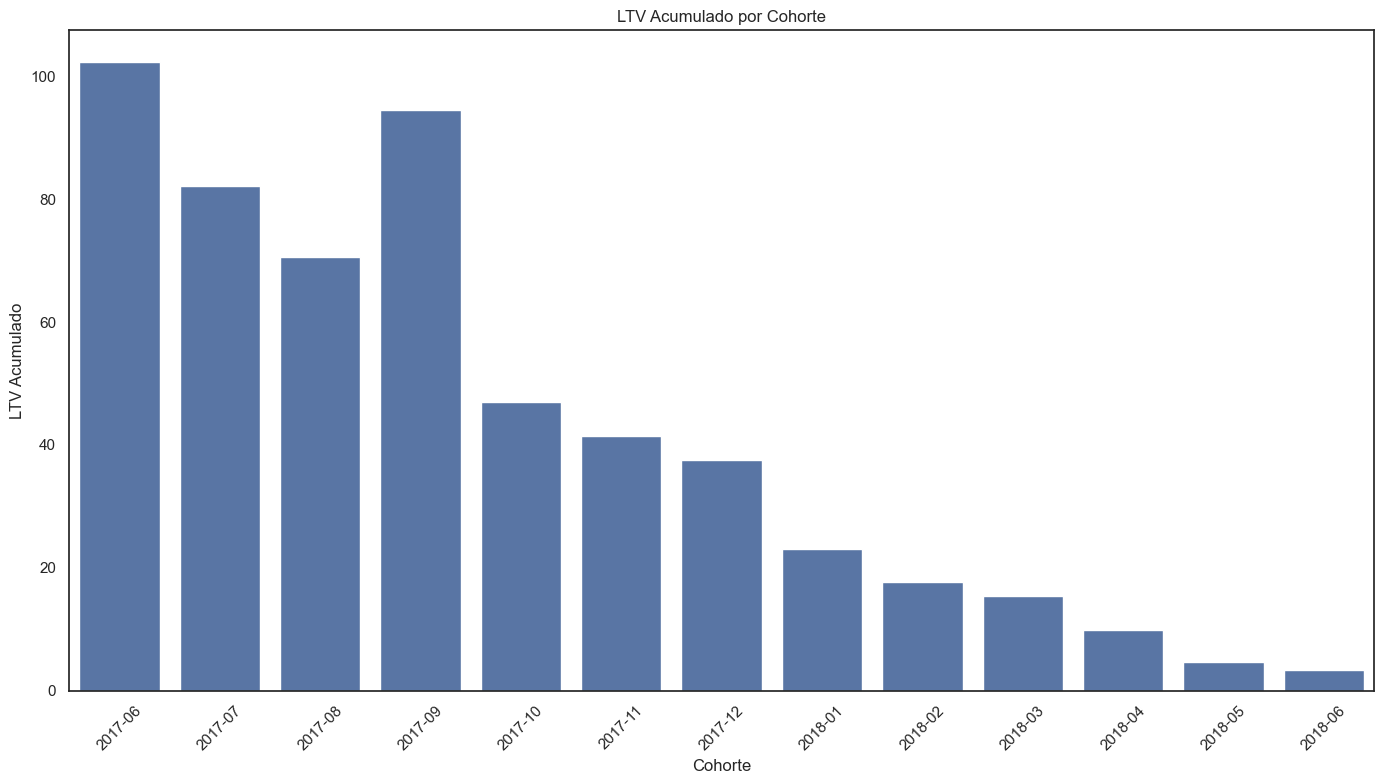

In [47]:
#Gráfico de barras para mejorar la visualización
plt.figure(figsize=(14, 8))
sns.barplot(x=ltv_acumulado_cohort.index.astype(str), y=ltv_acumulado_cohort.values)
plt.xlabel('Cohorte')
plt.ylabel('LTV Acumulado')
plt.title('LTV Acumulado por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que la cohorte de junio de 2017 es la que tiene el que mayor LTV seguido de la cohorte de septiembre. En último lugar está la cohorte de junio de 2018. 

### 3. Marketing

#### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [48]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [49]:
#Total de costos por fuente
source_cost = df_costs.groupby('source_id')['costs'].sum().reset_index()
display(source_cost)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [50]:
#Total agrupado por meses y por fuente
cost_by_month_source = df_costs.groupby(['source_id']).resample('M', on='dt')['costs'].sum().reset_index()
cost_by_month_source['dt'] = cost_by_month_source['dt'].dt.to_period('M')
display(cost_by_month_source)

/var/folders/l8/48njkf7n48j_jq041ftk4lzc0000gn/T/ipykernel_26375/2902224053.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cost_by_month_source = df_costs.groupby(['source_id']).resample('M', on='dt')['costs'].sum().reset_index()


,source_id,dt,costs
0,1,2017-06,1125.61
1,1,2017-07,1072.88
2,1,2017-08,951.81
3,1,2017-09,1502.01
4,1,2017-10,2315.75
...,...,...,...
79,10,2018-01,614.35
80,10,2018-02,480.88
81,10,2018-03,526.41
82,10,2018-04,388.25


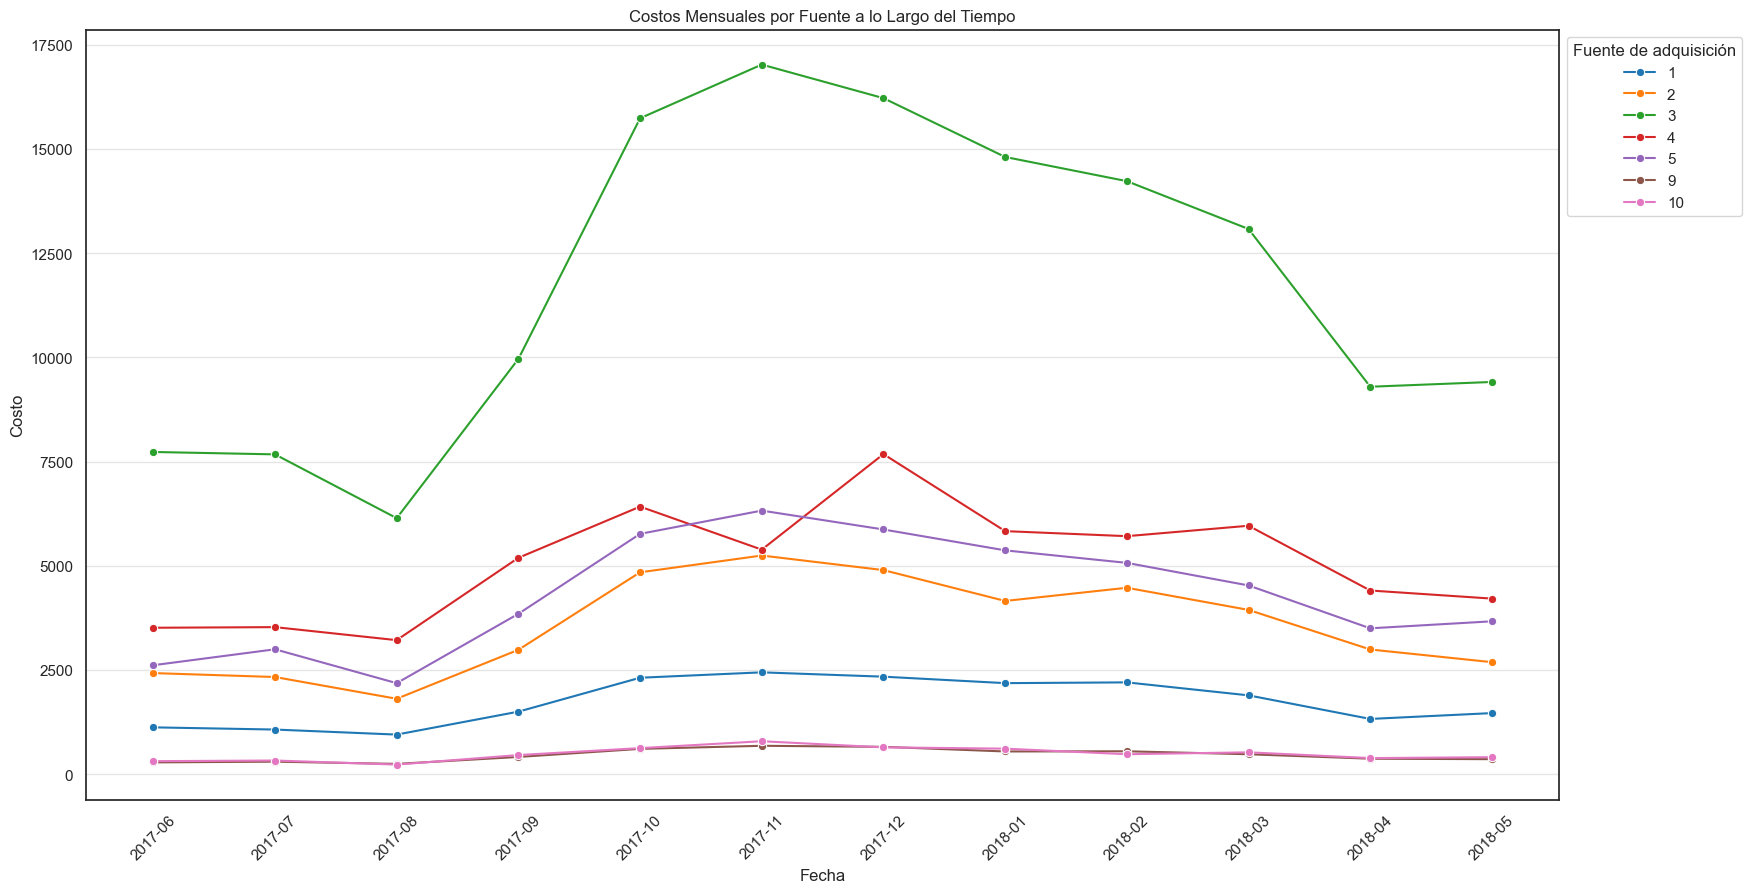

In [51]:
#Gráfico de líneas para mejorar la visualización
#Conversión de dt a string para evitar problemas en el gráfico
cost_by_month_source['dt'] = cost_by_month_source['dt'].astype(str)

#Gráfico
plt.figure(figsize=(19,10))
sns.lineplot(x='dt', y='costs', hue='source_id', data=cost_by_month_source, marker='o', palette='tab10')
plt.title('Costos Mensuales por Fuente a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Costo')
plt.xticks(rotation=45) 
plt.legend(title='Fuente de adquisición', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

Se observa que la fuente 3 es la fuente en la que más dinero se gastó en todos los meses y de manera general. En segundo lugar está la fuente 4 seguida de la 5. Se observa que en último lugar está la fuente 9.

#### ¿Cuál fue el CAC (Customer Acquisition Cost) de cada una de las fuentes?

In [52]:
#Ordenar el df por 'uid' y 'start_ts'
df_visits_sorted = df_visits.sort_values(by=['uid', 'start_ts']).drop_duplicates(subset=['uid'], keep='first')
#Obtener los datos de la primera fuente de adquisición
first_source_data = df_visits_sorted[['uid', 'source_id']]

In [53]:
#Merge de la primera fuente de adquisición con los usuarios que hicieron una compra
first_data_users = df_conversion[['uid', 'first_visit', 'first_order']].copy()
first_data_users = first_data_users.merge(first_source_data, on='uid', how='left')

#Usuarios adquiridos por cada fuente
user_by_source = first_data_users.groupby('source_id')['uid'].nunique().reset_index()
user_by_source.columns = ['source_id', 'n_users']
display(user_by_source)

,source_id,n_users
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [54]:
#Costos por fuente de adquisición
source_cost=df_costs.groupby('source_id')['costs'].sum().reset_index()

#Merge de los costos totales con el número de usuarios adquiridos por cada fuente
cac_data=source_cost.merge(user_by_source, on='source_id')

#CAC
cac_data['CAC']=cac_data['costs'] / cac_data['n_users']
display(cac_data)

,source_id,costs,n_users,CAC
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479
5,9,5517.49,1088,5.071222
6,10,5822.49,1329,4.381106


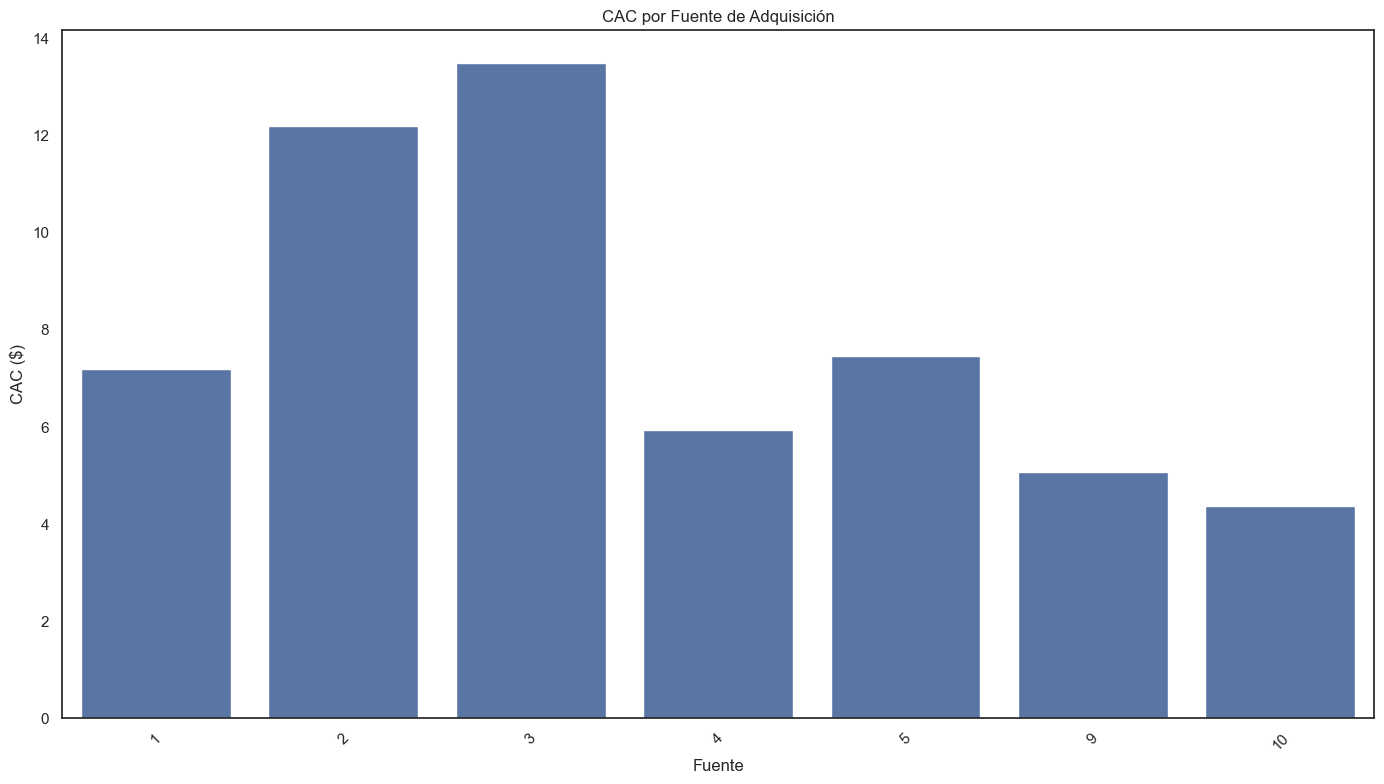

In [55]:
#Gráfico de barras para mejorar la visualización 
plt.figure(figsize=(14, 8))
sns.barplot(x='source_id', y='CAC', data=cac_data)
plt.xlabel('Fuente')
plt.ylabel('CAC ($)')
plt.title('CAC por Fuente de Adquisición')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que la fuente más costosa es la 3 seguida de la 2. La menos costosa es la 10

#### ¿Cuán rentables eran las inversiones? (ROMI)

In [56]:
#Obtener la fuente de la primera visita de cada usuario
first_source_data = (df_visits.sort_values(by=['uid', 'start_ts']).drop_duplicates(subset=['uid'], keep='first')[['uid', 'source_id']])
#Obtener el mes de la primera compra de cada usuario
first_order_data = df_orders[['uid', 'first_order']].drop_duplicates()
#Merge con df_orders
orders_extended=df_orders.copy()
orders_extended=orders_extended.merge(first_source_data, on='uid', how='left')
#Merge con first_order_data eliminando la columna first_order antes del merge
orders_extended = orders_extended.drop(columns=['first_order']).merge(first_order_data, on='uid', how='left')

In [57]:
#Convertir la fecha de primera compra en cohorte mensual
orders_extended['cohort']=orders_extended['first_order'].dt.to_period('M')
#Agregar la edad de la cohorte en meses
orders_extended['cohort_age']=(orders_extended['buy_ts'].dt.to_period('M') - orders_extended['cohort']).apply(lambda x: x.n)
#Calcular el tamaño inicial de cada cohorte
cohort_sizes=orders_extended.groupby(['source_id', 'cohort'])['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'cohort_size'}, inplace=True)
#Calcular el revenue por cohorte y mes 
cohort_revenue=orders_extended.groupby(['source_id', 'cohort', 'cohort_age'])['revenue'].sum().reset_index()

In [58]:
#Merge del revenue con los tamaños de cohorte para calcular el LTV
ltv_data=cohort_revenue.merge(cohort_sizes, on=['source_id', 'cohort'], how='left')
ltv_data['LTV'] = ltv_data['revenue'] / ltv_data['cohort_size']
#Obtener los costos por fuente y mes de primera compra
monthly_costs=df_costs.groupby(['source_id', df_costs['dt'].dt.to_period('M')])['costs'].sum().reset_index()
monthly_costs.rename(columns={'dt': 'cohort'}, inplace=True)
#Unir los costos con los tamaños de cohorte para calcular el CAC
cac_data_2=monthly_costs.merge(cohort_sizes, on=['source_id', 'cohort'], how='left')
cac_data_2['CAC'] = cac_data_2['costs'] / cac_data_2['cohort_size']
#Unir LTV y CAC en un solo dataframe
romi_data=ltv_data.merge(cac_data_2[['source_id', 'cohort', 'CAC']], on=['source_id', 'cohort'], how='left')

In [59]:
#ROMI
romi_data['ROMI'] = romi_data['LTV'] / romi_data['CAC']

#Crear una tabla pivote con ROMI
df_romi_pivot = romi_data.pivot_table(
    index="source_id",
    columns="cohort_age",
    values="ROMI",
    aggfunc="sum"
)

df_romi_pivot = df_romi_pivot.reset_index()
display(df_romi_pivot)

cohort_age,source_id,0,1,2,3,4,5,6,7,8,9,10,11
0,1,10.713221,1.680251,1.721291,1.475781,1.020952,0.617057,0.633593,0.931044,0.861271,0.520409,0.341759,0.281998
1,2,6.591433,1.387721,1.281093,1.301395,0.668325,0.464366,0.454709,0.258779,0.182309,0.097182,0.163953,0.041946
2,3,4.033817,0.247455,0.132242,0.098038,0.067947,0.046914,0.030217,0.027531,0.023498,0.010441,0.006030,0.002655
3,4,9.088903,0.359568,0.184991,0.279115,0.240800,0.274649,0.398434,0.095871,0.053774,0.116185,0.152311,0.009975
4,5,7.979072,0.491550,0.419779,2.779106,0.446557,0.487153,0.278407,0.193602,0.137613,0.185452,0.033457,0.017121
5,7,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,9.288160,0.651759,0.761684,0.592288,0.364766,0.305158,0.346192,0.254062,0.412344,0.070181,0.032009,NaN
7,10,8.728518,0.180227,0.097051,0.094455,0.034962,0.018850,0.015492,0.038868,0.008472,0.014447,NaN,NaN


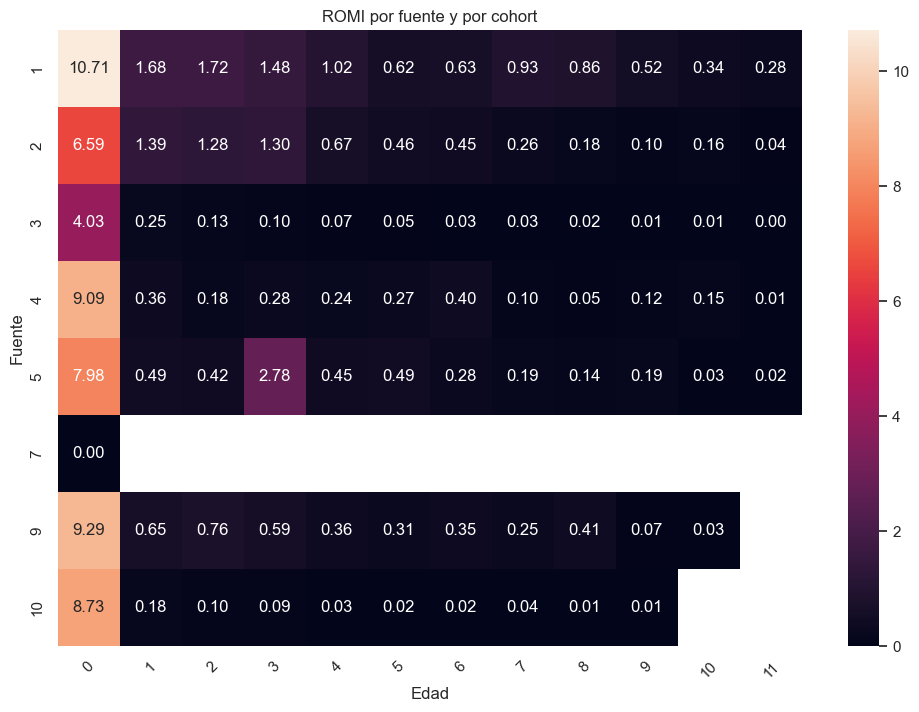

In [60]:
#Heatmap para mejorar la visualización 
plt.figure(figsize=(12, 8))
sns.heatmap(df_romi_pivot.set_index('source_id'), annot=True, fmt='.2f')
plt.title('ROMI por fuente y por cohort')
plt.xlabel('Edad')
plt.ylabel('Fuente')
plt.xticks(rotation=45)
plt.show()

Se observa que para la primer cohorte las fuentes más efectivas fueron la 1, 9 y 4. En general se observa que las mejores fuentes son la 1 y la 2. En el caso de las fuentes 4 y 9 también se observan buenos valores para esta métrica. Se muestra que la fuente 7 es la peor.

#### Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

LTV por dispositivo y por fuente 

In [61]:
#LTV por fuente y dispositivo
first_source_device = df_visits.groupby('uid').agg({'source_id': 'first', 'device': 'first'}).reset_index()
df_orders_source_device = df_orders.merge(first_source_device, on='uid', how='left')
df_orders_source_device['buy_date'] = df_orders_source_device['buy_ts'].dt.date

In [62]:
margin_rate = 0.5

#Beneficio bruto diario por fuente y dispositivo
daily_gp_by_source_device = df_orders_source_device.groupby(['source_id', 'device', 'buy_date'])['revenue'].sum() * margin_rate
daily_gp_by_source_device = daily_gp_by_source_device.reset_index()
daily_gp_by_source_device.columns = ['source_id', 'device', 'date', 'gross_profit']

#Clientes únicos por día, fuente y dispositivo
daily_customers_by_source_device = df_orders_source_device.groupby(['source_id', 'device', 'buy_date'])['uid'].nunique().reset_index()
daily_customers_by_source_device.columns = ['source_id', 'device', 'date', 'n_clients']

#Daily LTV por fuente y dispositivo
daily_ltv_by_source_device = daily_gp_by_source_device.merge(daily_customers_by_source_device, on=['source_id', 'device', 'date'])
daily_ltv_by_source_device['daily_ltv'] = daily_ltv_by_source_device['gross_profit'] / daily_ltv_by_source_device['n_clients']

#Columnas necesarias
ltv_by_source_device = daily_ltv_by_source_device[['source_id', 'device', 'date', 'daily_ltv']]

#Promedio de LTV diario por fuente y dispositivo
ltv_by_source_device = ltv_by_source_device.groupby(['source_id', 'device'], as_index=False)['daily_ltv'].mean()
ltv_by_source_device.columns = ['source_id', 'device', 'daily_ltv']
display(ltv_by_source_device)

,source_id,device,daily_ltv
0,1,desktop,3.318451
1,1,touch,3.201068
2,2,desktop,4.713696
3,2,touch,2.870345
4,3,desktop,2.176419
5,3,touch,2.071150
6,4,desktop,2.262949
7,4,touch,2.362155
8,5,desktop,2.458207
9,5,touch,2.020765


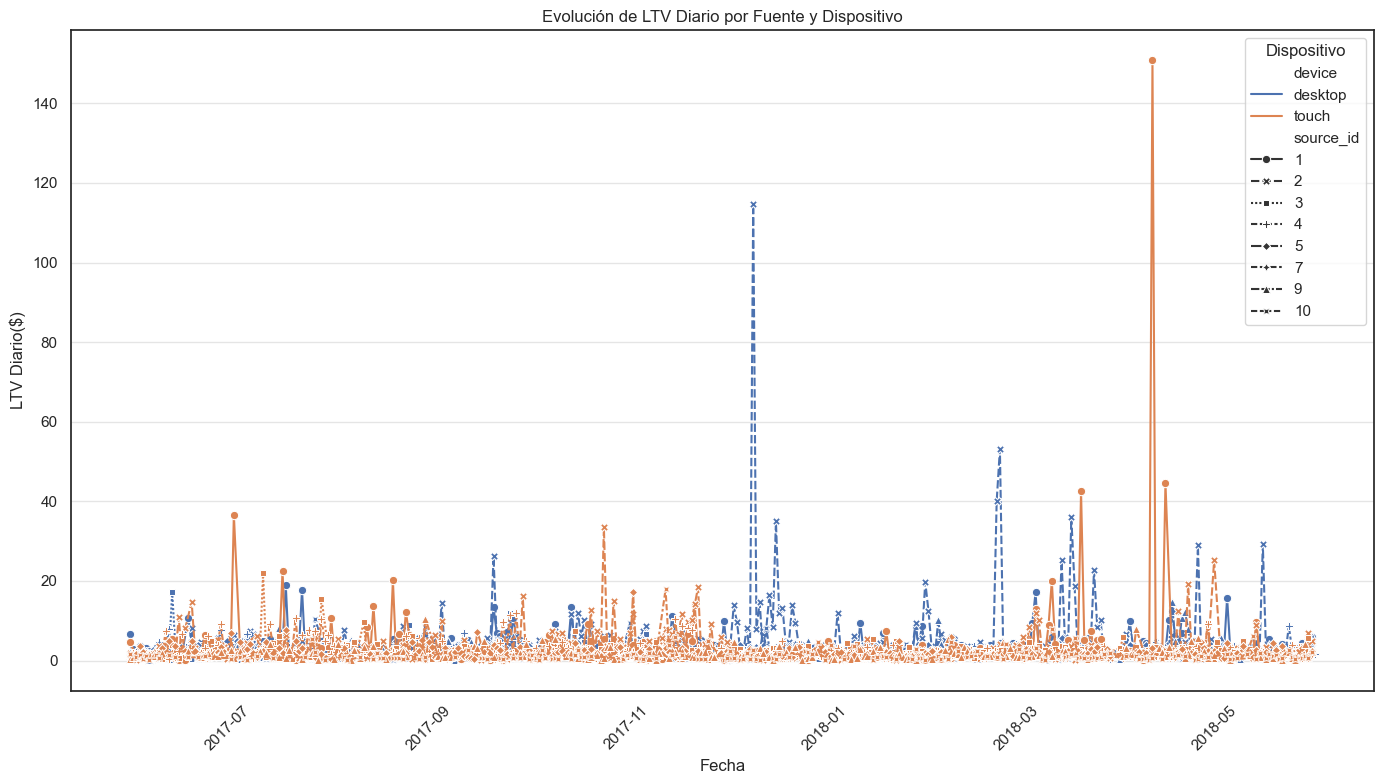

In [63]:
#Gráfico de LTV diario a lo largo del tiempo por fuente y dispositivo
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_ltv_by_source_device, x='date', y='daily_ltv', hue='device', style='source_id', markers=True)
plt.xlabel('Fecha')
plt.ylabel('LTV Diario($)')
plt.title('Evolución de LTV Diario por Fuente y Dispositivo')
plt.legend(title='Dispositivo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Se observa que la fuente 1 es la que más LTV generó en los dispositivos touch en abril de 2018 y la fuente 2 es la que más generó en los dispositivos de escritorio en diciembre de 2017, siendo estas dos, las que más impacto han tenido en el transcurso del año para ambos dispositivos. Esto sugiere que es más conveniente invertir en estas dos fuentes.

CAC por dispositivo y por fuente 

In [64]:
#Preparación de datos de CAC por fuente y dispositivo
first_data_users = df_conversion[['uid', 'first_visit', 'first_order']].copy()
first_data_users = first_data_users.merge(df_visits[['uid', 'source_id', 'device']], on='uid', how='left')
first_data_users['first_visit_date'] = first_data_users['first_visit'].dt.date
first_data_users['first_order_date'] = first_data_users['first_order'].dt.date

#Agrupación por fuente, dispositivo y fecha para obtener la cantidad de clientes
users_per_source_device = first_data_users.groupby(['source_id', 'device', 'first_visit_date']).agg(n_clients=('uid', 'nunique')).reset_index()
users_per_source_device['first_visit_date'] = pd.to_datetime(users_per_source_device['first_visit_date'])

#Merge con los datos de costos
cac_clients_device = users_per_source_device.merge(df_costs, left_on=['source_id', 'first_visit_date'], right_on=['source_id', 'dt'])

#CAC diario por fuente y dispositivo
cac_clients_device['daily_cac'] = cac_clients_device['costs'] / cac_clients_device['n_clients']

#Promedio de CAC por fuente y dispositivo
cac_per_source_device = cac_clients_device.groupby(['source_id', 'device'], as_index=False)['daily_cac'].mean()
cac_per_source_device.columns = ['source_id', 'device', 'daily_cac']
display(cac_per_source_device)

,source_id,device,daily_cac
0,1,desktop,4.777303
1,1,touch,15.287011
2,2,desktop,10.475594
3,2,touch,30.975084
4,3,desktop,14.170293
5,3,touch,70.352954
6,4,desktop,6.390254
7,4,touch,22.429353
8,5,desktop,6.939836
9,5,touch,38.749777


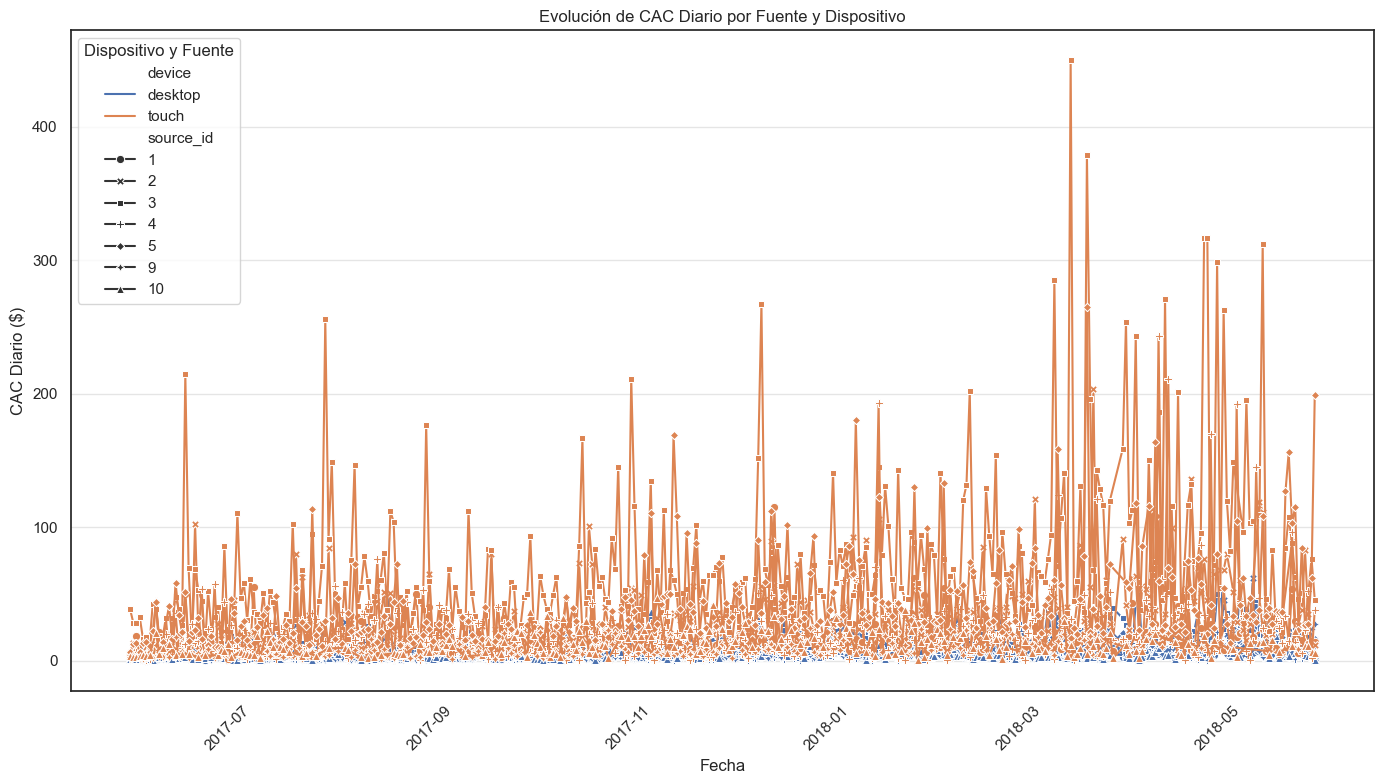

In [65]:
# Gráfico de CAC diario a lo largo del tiempo por fuente y dispositivo
plt.figure(figsize=(14, 8))
sns.lineplot(data=cac_clients_device, x='first_visit_date', y='daily_cac', hue='device', style='source_id', markers=True, dashes=False)
plt.xlabel('Fecha')
plt.ylabel('CAC Diario ($)')
plt.title('Evolución de CAC Diario por Fuente y Dispositivo')
plt.legend(title='Dispositivo y Fuente')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()

Se observa que los clientes más costosos son los clientes con dispositivos touch y como ya se había observado, la fuente más costosa es la 3. En este caso se confirma que conviene más invertir en la fuuente 1, que es la que obtuvo mejores resultados para abril de 2018.

ROMI por Fuente y Dispositivo

In [66]:
#Merge de LTV y CAC por fuente y dispositivo
romi_data_device = ltv_by_source_device.merge(cac_per_source_device, on=['source_id', 'device'])
#ROMI por fuente y dispositivo
romi_data_device['romi'] = (romi_data_device['daily_ltv'] - romi_data_device['daily_cac']) / romi_data_device['daily_cac']
display(romi_data_device)

,source_id,device,daily_ltv,daily_cac,romi
0,1,desktop,3.318451,4.777303,-0.305371
1,1,touch,3.201068,15.287011,-0.790602
2,2,desktop,4.713696,10.475594,-0.550031
3,2,touch,2.870345,30.975084,-0.907334
4,3,desktop,2.176419,14.170293,-0.846410
5,3,touch,2.071150,70.352954,-0.970561
6,4,desktop,2.262949,6.390254,-0.645875
7,4,touch,2.362155,22.429353,-0.894685
8,5,desktop,2.458207,6.939836,-0.645783
9,5,touch,2.020765,38.749777,-0.947851


ROMI a lo largo del tiempo por fuente y por dispositivo

In [67]:
daily_ltv_by_source_device['date'] = pd.to_datetime(daily_ltv_by_source_device['date'])
cac_clients_device['first_visit_date'] = pd.to_datetime(cac_clients_device['first_visit_date'])


#Merge de LTV y CAC por fuente y dispositivo
daily_romi = daily_ltv_by_source_device.merge(cac_clients_device[['source_id', 'device', 'first_visit_date', 'daily_cac']], 
                                              left_on=['source_id', 'device', 'date'], 
                                              right_on=['source_id', 'device', 'first_visit_date'])

#ROMI diario
daily_romi['romi'] = (daily_romi['daily_ltv'] - daily_romi['daily_cac']) / daily_romi['daily_cac']
daily_romi = daily_romi.rename(columns={'date': 'date'})

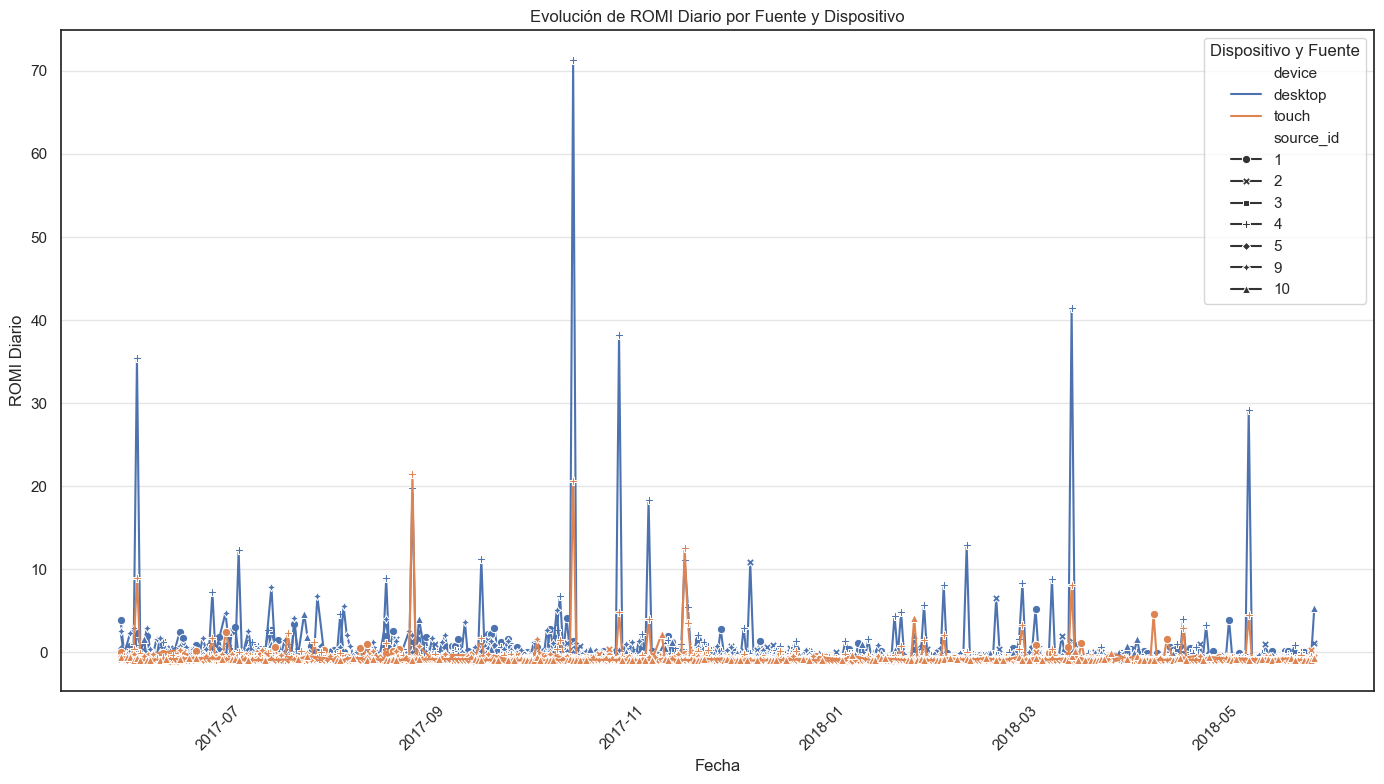

In [68]:
#Gráfico de ROMI diario a lo largo del tiempo por fuente y dispositivo
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_romi, x='date', y='romi', hue='device', style='source_id', markers=True, dashes=False)
plt.xlabel('Fecha')
plt.ylabel('ROMI Diario')
plt.title('Evolución de ROMI Diario por Fuente y Dispositivo')
plt.legend(title='Dispositivo y Fuente')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Se puede observar que hay picos muy altos en desktop y otros no tan altos pero sí significativos en touch para la fuente 4, lo que sugiere que esta es la que recupera las inversiones con más facilidad. Las fuentes 1 y 2 también tienen visibilidad aunque no tanto como la 4. El resto se mantiene cerca del 0 lo que significa que se pierde dinero en inversiones y estas no se recuperan. 

### 3. Conclusiones

#### Aconseja a los expertos de marketing cuánto dinero invertir y dónde

Recomendaría invertir en la fuente 1, 2 y 4 principalmente, ya que la fuente 1 y 2 son las que logran un mayor LTV en dispositivos desktop y también touch. Por otra parte, recomendaría invertir en la fuene 4, ya que en esta es en la que se puede recuperar la inversión de clientes con mayor facilidad  a lo largo del tiempo. Recomendaría recortar las inversiones en el resto de las fuentes ya que cuando se observa de manera general el ROMI es negativo, por lo tanto se está gastando más dinero de lo que se recupera. Estas inversiones están siendo en vano, sí se pasa ese dinero en las inversiones de las fuentes 1, 2 y 4 por un tiempo de prueba, probablemente se obtengan mejores resultados de los que se tienen hasta mayo de 2018.
Recomendaría que las inversiones de la fuente 1 se hicieran principalmente en dispositivos touch por los valores que tienen en LTV estos dispositivos en fechas recientes y en la fuente 2 para los dispositivos desktop. La fuente 4, que es en la que se tiene un ROMI con mejores métricas recomendaría invertir por igual en ambos dispositivos para posteriormente hacer un estudio y saber si los resultados son favorables. 

Con el desarrollo de este proyecto se pudo observar que en cuestión de visitas, el pico más alto en general fue en diciembre de 2017 y que la duración de las sesiones para hacer compras a los eventos es de 60 segundos y que en promedio, se tiene sólo una sesión por día. Cuando se observaron los datos por cohortes en las que se dividieron por mes de la primer compra, se apreció que la tasa de retención de la primer cohorte fue mejor en los primeros meses en comparación con el resto de las cohortes y que conforme pasaron los meses se observó una tendencia de disminución en el resto de las cohortes.

En cuanto a ventas, se apreció que la mayoría de los usuarios se convierten en compradores en los primeros 5 días, los usuartios que compran después de ese periodo son menos de una décima parte. Los usuarios que tardan más de 50 días en comprar son casi imperceptibles. Respecto a pedidos se oservó que en general, las cohortes que hacen el mayor número de pedidos, son las que se crean el mismo mes. Las cifras del resto de las cohortes para los meses en las que no son creadas no son significantes. Se observa que la actividad de las cohortes disminuyen con el paso de los meses. Respecto al Lifetime value se observó que la cohorte de junio es la que tiene el valor más alto seguida por la de septiembre.

Respecto a marketing se observó que la fuente más costosa a lo largo del tiempo es la 3 al igual que el costo de adquisición de clientes. Aunque si bien, es cierto que la fuente 3 atrae el mayor número de clientes, la fuente npumero 4 atrae prácticamente al la misma cantidad por la mitad de costo. Con el LTV y CAC por fuente y por dispositivos se pudo observar que la mayoría de fuentes de publicidad, solo generan pérdidas y resaltó que con cambiar estas inversiones en las fuentes 1, 2 y 4 podría resultar mejor para la empresa.  